In [1]:
def read_fasta(file_path):
    '''Reading fasta formatted file and returning into line'''
    with open(file_path, 'r') as f:
        # for storing the contents of the file into a list
        fasta_file = [line.strip('\n') for line in f.readlines()]

    # for storing labels and data
    fasta_dict = {}
    fasta_label = ''

    # for preparing data and taking into dictionary
    for line in fasta_file:
        if '>' in line:
            fasta_label = line[1:]
            fasta_dict[fasta_label] = ''
        else:
            fasta_dict[fasta_label] += line
    return fasta_dict

In [2]:
# Run multiple sequences alignment using mafft software

#mafft
#conda install -c biocore mafft
#!mafft sequences.fasta > sequences_alignment.fasta

In [3]:
seqs = read_fasta("sequences_alignment.fasta")

In [4]:
# The sequence length for each entry

for entry in seqs.keys():
    print(len(seqs[entry]))

29912
29912
29912
29912
29912
29912


In [5]:
# spikes protein
#21563..25384

In [6]:
def gapped_pos(seq, pos):
    non_gap = 0
    gaps = 0
    for nt in seq:
        if nt != '-':
            non_gap += 1
        else:
            gaps += 1
        if non_gap == pos:
            return pos + gaps

In [7]:
gapped_pos('aaa-aa-a', 6)

8

In [8]:
gapped_pos(seqs['Wuhan_strain'], 21563)

21563

In [9]:
gapped_pos(seqs['Wuhan_strain'], 25384)

25393

In [10]:
spikes = {}
for seq in seqs:
    spikes[seq] = seqs[seq][21563-1:25393]

In [11]:
spikes

{'Wuhan_strain': 'atgtttgtttttcttgttttattgccactagtctctagtcagtgtgttaatcttacaaccagaactcaattaccccctgcatacactaattctttcacacgtggtgtttattaccctgacaaagttttcagatcctcagttttacattcaactcaggacttgttcttacctttcttttccaatgttacttggttccatgctatacatgtctctgggaccaatggtactaagaggtttgataaccctgtcctaccatttaatgatggtgtttattttgcttccactgagaagtctaacataataagaggctggatttttggtactactttagattcgaagacccagtccctacttattgttaataacgctactaatgttgttattaaagtctgtgaatttcaattttgtaatgatccatttttgggtgtttattaccacaaaaacaacaaaagttggatggaaagtgagttcagagtttattctagtgcgaataattgcacttttgaatatgtctctcagccttttcttatggaccttgaaggaaaacagggtaatttcaaaaatcttagggaatttgtgtttaagaatattgatggttattttaaaatatattctaagcacacgcctattaatttagtgcgt---------gatctccctcagggtttttcggctttagaaccattggtagatttgccaataggtattaacatcactaggtttcaaactttacttgctttacatagaagttatttgactcctggtgattcttcttcaggttggacagctggtgctgcagcttattatgtgggttatcttcaacctaggacttttctattaaaatataatgaaaatggaaccattacagatgctgtagactgtgcacttgaccctctctcagaaacaaagtgtacgttgaaatccttcactgtagaaaaaggaatctatcaaacttctaactttagagtccaaccaacagaat

In [12]:
for spike in spikes:
    print(spikes[spike][0:10])

atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt
atgtttgttt


In [13]:
def get_mutations(initial, variant):
    seqs = list(zip(initial, variant))
    for pos, nt in enumerate(seqs):
        if nt[0] != nt[1]:
            print(nt[0].upper() + str(pos) + nt[1].upper())

In [14]:
spikes.keys()

dict_keys(['Wuhan_strain', 'B.1.1.7|Alpha', 'B.1.351|Beta', 'P.1|Gamma', 'B.1.617.2|Delta', 'B.1.1.529|Omricon'])

In [15]:
get_mutations(spikes['Wuhan_strain'], spikes['B.1.1.529|Omricon'])

C199T
T202-
A203-
C204-
A205-
T206-
G207-
C283T
G424-
T425-
G426-
T427-
T428-
T429-
A430-
T431-
T432-
A631-
T632-
T633-
-642G
-643A
-644G
-645C
-646C
-647A
-648G
-649A
-650A
G1024A
T1119C
C1120T
T1125C
C1132T
G1259T
T1328G
G1344A
G1438A
C1441A
A1459C
A1486G
G1494A
A1501G
A1509T
T1521C
C1648A
A1849G
C1971T
T2045G
C2050A
C2300A
G2394T
C2576A
A2870T
T2915A
C2949T
C3446T


In [16]:
DNA_Codons = {
    # 'M' - START, '_' - STOP
    "GCT": "A", "GCC": "A", "GCA": "A", "GCG": "A",
    "TGT": "C", "TGC": "C",
    "GAT": "D", "GAC": "D",
    "GAA": "E", "GAG": "E",
    "TTT": "F", "TTC": "F",
    "GGT": "G", "GGC": "G", "GGA": "G", "GGG": "G",
    "CAT": "H", "CAC": "H",
    "ATA": "I", "ATT": "I", "ATC": "I",
    "AAA": "K", "AAG": "K",
    "TTA": "L", "TTG": "L", "CTT": "L", "CTC": "L", "CTA": "L", "CTG": "L",
    "ATG": "M",
    "AAT": "N", "AAC": "N",
    "CCT": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "CAA": "Q", "CAG": "Q",
    "CGT": "R", "CGC": "R", "CGA": "R", "CGG": "R", "AGA": "R", "AGG": "R",
    "TCT": "S", "TCC": "S", "TCA": "S", "TCG": "S", "AGT": "S", "AGC": "S",
    "ACT": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "GTT": "V", "GTC": "V", "GTA": "V", "GTG": "V",
    "TGG": "W",
    "TAT": "Y", "TAC": "Y",
    "TAA": "_", "TAG": "_", "TGA": "_"}

In [17]:
with open('spikes.fasta', 'w') as f:
    for spike in spikes:
        out = spikes[spike].replace('-', '').upper()
        
        aa = ''
        for i in range(0, len(out), 3):
            aa += DNA_Codons[out[i:i+3]]
            
        f.write('>' + spike + '\n')
        f.write(str(aa).upper()+'\n')

In [18]:
#!mafft spikes.fasta > spikes_alignment.fasta

In [20]:
spikes_aa_align = read_fasta("spikes_alignment.fasta")

In [21]:
spikes_aa_align['Wuhan_strain']

'MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVR---DLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRL

In [25]:
spikes_aa_align.keys()

dict_keys(['Wuhan_strain', 'B.1.1.7|Alpha', 'B.1.351|Beta', 'P.1|Gamma', 'B.1.617.2|Delta', 'B.1.1.529|Omricon'])

In [22]:
def get_aa_mutations(initial, variant):
    out = []
    seqs = list(zip(initial, variant))
    for pos, aa in enumerate(seqs):
        if aa[0] != aa[1]:
            out.append(aa[0].upper() + str(pos) + aa[1].upper())
    return out

In [26]:
len(get_aa_mutations(spikes_aa_align['Wuhan_strain'], spikes_aa_align['B.1.617.2|Delta']))

10

In [27]:
for item in seqs:
    print(item + ' '+str(len(get_aa_mutations(spikes_aa_align['Wuhan_strain'], spikes_aa_align[item]))))

Wuhan_strain 0
B.1.1.7|Alpha 10
B.1.351|Beta 10
P.1|Gamma 12
B.1.617.2|Delta 10
B.1.1.529|Omricon 39


In [28]:
import matplotlib.pyplot as plt

In [29]:
mutations = {}
for item in seqs:
    mutations[item] = get_aa_mutations(spikes_aa_align['Wuhan_strain'], spikes_aa_align[item])

In [30]:
mutations

{'Wuhan_strain': [],
 'B.1.1.7|Alpha': ['H68-',
  'V69-',
  'Y143-',
  'N503Y',
  'A572D',
  'D616G',
  'P683H',
  'T718I',
  'S984A',
  'D1120H'],
 'B.1.351|Beta': ['D79A',
  'D217G',
  'L243-',
  'L244-',
  'A245-',
  'K419N',
  'E486K',
  'N503Y',
  'D616G',
  'A703V'],
 'P.1|Gamma': ['L17F',
  'T19N',
  'P25S',
  'D137Y',
  'R189S',
  'K419T',
  'E486K',
  'N503Y',
  'D616G',
  'H657Y',
  'T1029I',
  'V1178F'],
 'B.1.617.2|Delta': ['T18R',
  'G141D',
  'E155G',
  'F156-',
  'R157-',
  'L454R',
  'T480K',
  'D616G',
  'P683R',
  'D952N'],
 'B.1.1.529|Omricon': ['A66V',
  'H68-',
  'V69-',
  'T94I',
  'G141D',
  'V142-',
  'Y143-',
  'Y144-',
  'N210-',
  'L211I',
  '-214E',
  '-215P',
  '-216E',
  'G341D',
  'S373L',
  'S375P',
  'S377F',
  'K419N',
  'N442K',
  'G448S',
  'S479N',
  'T480K',
  'E486A',
  'Q495R',
  'G498S',
  'Q500R',
  'N503Y',
  'Y507H',
  'T549K',
  'D616G',
  'H657Y',
  'N681K',
  'P683H',
  'N766K',
  'D798Y',
  'N858K',
  'Q956H',
  'N971K',
  'L983F']}

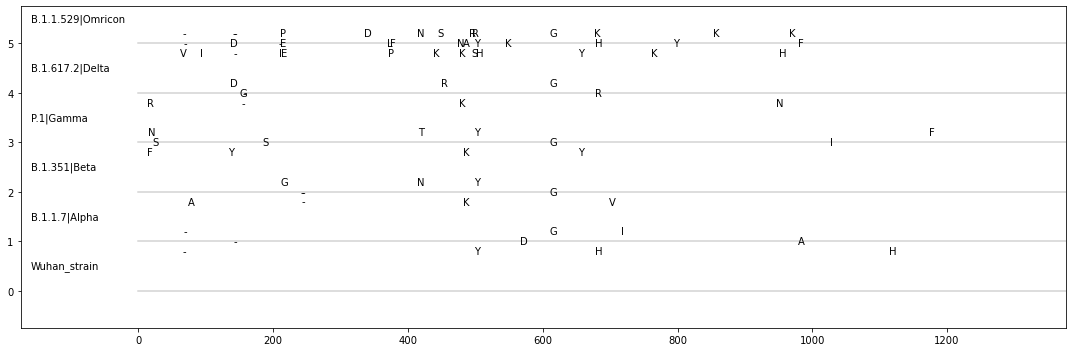

In [33]:
plt.figure(figsize = (15,5))
for y, item in enumerate(seqs):
    plt.plot((0,len(seqs['Wuhan_strain'])), (y,y), color = 'lightgrey')
    plt.text(-160, y+.5, item, va = 'center', ha = 'left')
    
    for yy, mutation in enumerate(mutations[item]):
        pos = int(mutation[1:-1])
        aa_change = mutation[-1]
        if yy%3 == 0:
            plt.text(pos, y-.2, aa_change, va = 'center', ha = 'center')
        elif yy%2 == 0:
            plt.text(pos, y, aa_change, va = 'center', ha = 'center')
        else:
            plt.text(pos, y+.2, aa_change, va = 'center', ha = 'center')
    
    plt.xlim(-175, len(spikes_aa_align['Wuhan_strain']) + 100)
    plt.ylim(-.75, 5.75)

# Configure the figure
plt.tight_layout()
plt.savefig('spikes_mutations.png', dpi=300)